## Bibliometric analysis for the documents in the year 2000-2020 which is extracted using query based reterival
- dataset contains 2000 rows and 47 columns
- some of the most important columns are:
- Authors : Name of authors in the publication
- Title : title of the publication or article
- Year : time period when it is published
- Source title : name of the source title
- Document Type : Type of publication such as article, book chapter or journal people etc.
- Access Type: whether the publication is open to access or paid

## Data Preprocessing Rules
For each plot i have created a copy of original data frame and all the preprocessing is done respective of the plot.
- **Missing Values**: I haven't used any technique to fulfill the missing as all the data is either text or categorical and this dataset is extracted from scopus website so i can't impute the values because if there is any NA value available is because of scopus has no record for that value.
- **Scatter Text**: There is a plot called scatter plot it uses HTML to show the plot however in jupyter notebook , will hav eto scroll to see the whole plot. I will attach one html file so that you can see the plot on the screen and i have also attached the screenshot in ppt.


### Libraries and Packages

In [1]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from DensityPlot.plot import density2d
from altair import Row, Column, Chart, Text, Scale, Color
import re
import plotly.offline as pyo
pyo.init_notebook_mode()
import altair as alt
import spacy
nlp = spacy.load('en')

### Data Loading from local file

In [3]:
df = pd.read_csv("/Users/macbookpro/Documents/Masters/Advanced_DV/DataViz_project_Data/scopus.csv")


In [4]:
df.head()

Authors  \
0  Larsen B., Olafsson V., Calabro F., Laymon C.,...   
1  Sun W.W., Krystofiak E.S., Leo-Macias A., Cui ...   
2  Musio B., Ragone R., Todisco S., Rizzuti A., L...   
3  MacArthur J.L., Hoicka C.E., Castleden H., Das...   
4  Lannes-Costa P.S., Baraúna R.A., Ramos J.N., V...   

                                        Author(s) ID  \
0  56486992300;9042656400;15063889700;7006139481;...   
1  57213146131;55357850000;12776478600;5680001210...   
2  57214708033;57213093470;57207943608;7005300448...   
3  35863397000;36158238100;9334076200;57211865218...   
4  57203127587;54400760000;55897934300;5720314641...   

                                               Title  Year  \
0  Maturation of the human striatal dopamine syst...  2020   
1  Nanoarchitecture and dynamics of the mouse ent...  2020   
2  A community-built calibration system: The case...  2020   
3  Canada's Green New Deal: Forging the socio-pol...  2020   
4  Comparative genomic analysis and identificatio...  2020   

                         Source title Volume Issue Art. No. Page start  \
0               Nature Communications     11     1      846        NaN   
1              Communications Biology      3     1        5        NaN   
2                             Talanta    214   NaN   120855        NaN   
3  Energy Research and Social Science     65   NaN   101442        NaN   
4   Infection, Genetics and Evolution     80   NaN   104195        NaN   

  Page end  ...  ISBN  CODEN   PubMed ID Language of Original Document  \
0      NaN  ...   NaN    NaN  32051403.0                       English   
1      NaN  ...   NaN    NaN  31925335.0                       English   
2      NaN  ...   NaN  TLNTA         NaN                       English   
3      NaN  ...   NaN    NaN         NaN                       English   
4      NaN  ...   NaN  IGENC  31954181.0                       English   

  Abbreviated Source Title Document Type Publication Stage  Access Type  \
0             Nat. Commun.       Article             Final  Open Access   
1          Commun. Biolog.       Article             Final  Open Access   
2                  Talanta       Article             Final          NaN   
3    Energy Res. Soc. Sci.  Short Survey             Final  Open Access   
4      Infec. Genet. Evol.       Article             Final          NaN   

   Source                 EID  
0  Scopus  2-s2.0-85079338451  
1  Scopus  2-s2.0-85077593485  
2  Scopus  2-s2.0-85079684819  
3  Scopus  2-s2.0-85080099374  
4  Scopus  2-s2.0-85077978992  

[5 rows x 47 columns]

In [5]:
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Access Type', 'Source', 'EID'],
      dtype='object')

In [6]:
df.shape

(2000, 47)

In [7]:
df_pre = df

In [8]:
df_pre = df_pre.drop(['Funding Text 1','Funding Text 2','Funding Text 3','Molecular Sequence Numbers'],axis = 1)

In [9]:
count = df_pre['Year'].value_counts()

### Plot 1. Annual Scientific Production

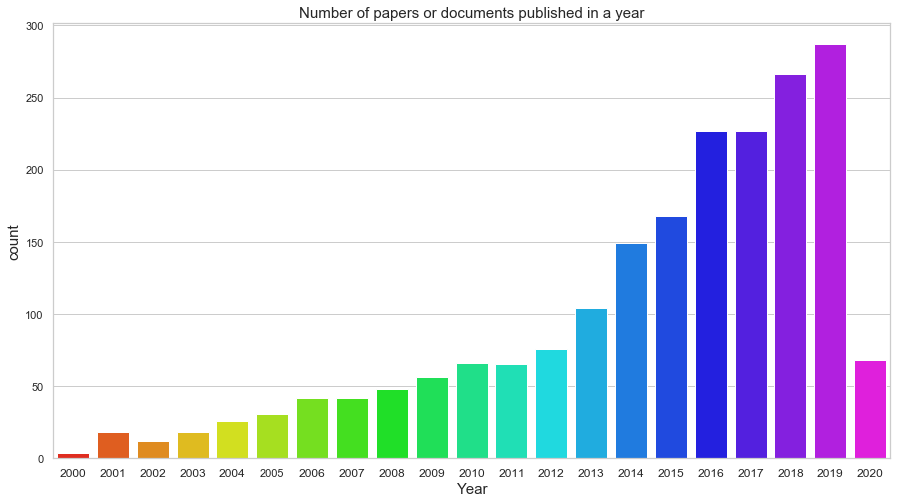

In [10]:
sns.set(style="whitegrid")
year_data = pd.DataFrame({
'Year' : ['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007'
           ,'2006','2005','2004','2003','2002','2001','2000'],
'count' :[68 ,287, 266, 227, 227, 168, 149, 104, 76, 65, 66, 56, 48, 42, 42, 31, 26, 18, 12, 18, 4]
})
fig,ax = plt.subplots(figsize = (15,8))
ax.set_title("Number of papers or documents published in a year",fontsize = 15)
ax.set_ylabel("Number of papers",fontsize=15)
ax.set_xlabel("Year",fontsize=15)
ax.set_xticklabels("Years",rotation = "horizontal",fontsize = 12)
#ax.set_yticklabels(fontsize = 12)
sns.barplot(data = year_data,x=year_data['Year'],y=year_data['count'],palette="gist_rainbow")



### Conclusion of the Bar chart 
- **Year 2019 shows highest number of publication**

### Plot 2. Word cloud for Abstract

In [11]:
abstracts = df_pre['Abstract']
df_abstract = pd.DataFrame({
    'Abstract':abstracts
})
df_abstract['Abstract'] = df_abstract['Abstract'].apply(lambda x : str.lower(x))
df_abstract['Abstract'] = df_abstract['Abstract'].apply(lambda x : " ".join(re.findall('[\w]+',x)))

In [12]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
def remove_stop_words(col):
    col = ' '.join(word for word in col.split() if word not in stop_words)
    return col

In [13]:
df_abstract['Abstract'] = df_abstract['Abstract'].apply(lambda x : remove_stop_words(x))

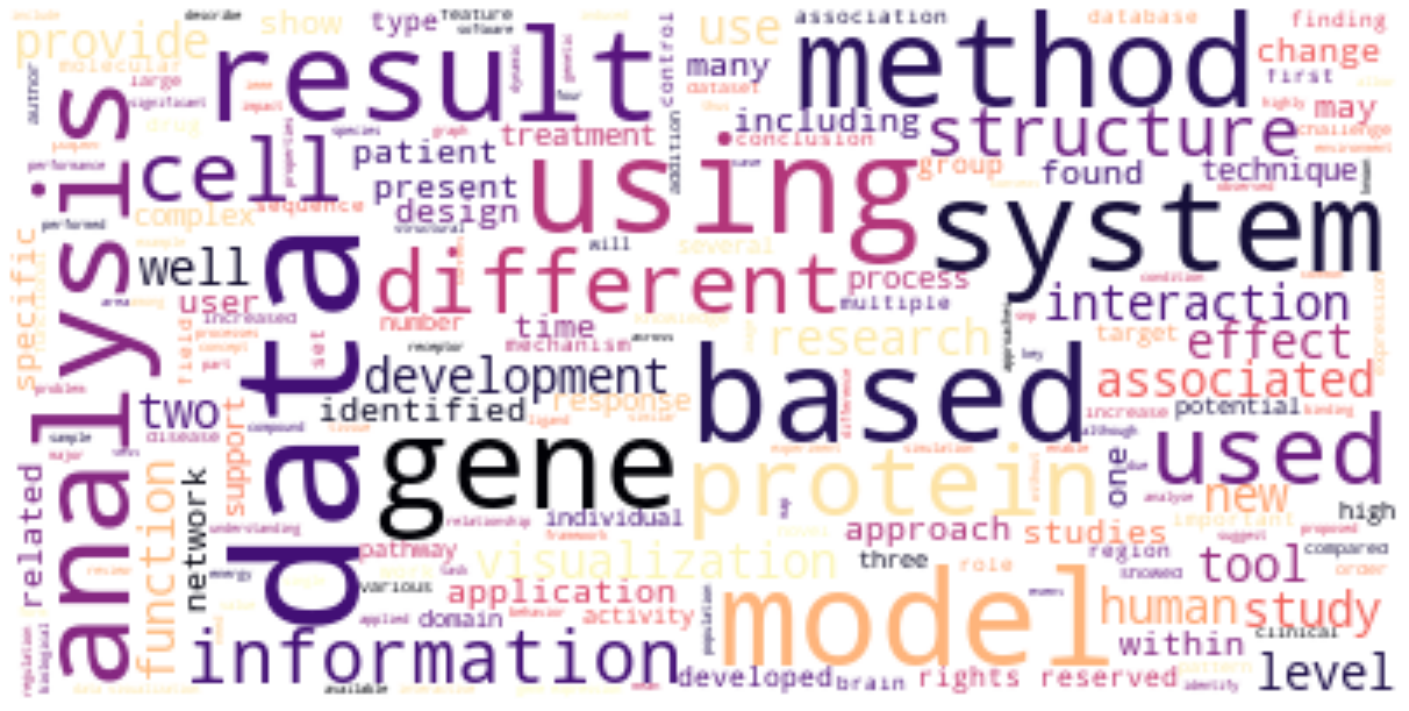

In [14]:
text = df_abstract.Abstract[0]
text = " ".join(abstract for abstract in df_abstract.Abstract)
wordcloud = WordCloud(max_font_size = 50,background_color = 'white',max_words = 200000,colormap='magma').generate(text)
fig,ax = plt.subplots(figsize = (25,25))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Conclusion of the Bar chart 
- **Word cloud is based on the frequency of a certain word present in the abstract of the paper**
- **According to Word Cloud "Data","analysis","model","method" or many more words shown with dark intensity colors signifies the dominance of words in publication abstract**

### Plot 3. Document types in Data

In [15]:
Labels = df_pre['Document Type'].unique()
count = df_pre['Document Type'].value_counts()
print(Labels)

['Article' 'Short Survey' 'Review' 'Conference Paper' 'Book Chapter'
 'Letter' 'Book' 'Note' 'Article in Press']


In [16]:
colors = ["#00FFFF",'#00BFFF','#0000FF',"#000080","#00008B","#4169E1","#708090","#008080","#008B8B"]

In [17]:
from plotly.offline import iplot
import plotly.graph_objects as go
target = ['Article' , 'Review', 'Conference Paper' ,'Book Chapter',
 'Letter', 'Book', 'Shortsurvey','Note','Article in Press']
sizes = [1241,228,378,80,3,61,3,3,3]
pie = go.Pie(labels=target, values=sizes,hole=.4,marker=dict(colors = colors,
                                                            line=dict(color='#FFF', width=1)),
                                                            domain={'x': [0.0,1.0], 'y': [0.0, 1.0]}
                                                            , name='Sources of Pie', textinfo='label+percent')
fig = go.Figure(data = [pie])
fig.update_layout(title={
        'text': "Documents By Type",
        'y':0.95,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'},
        width = 900,
        height = 600,
        margin = dict(t=50,b=50,l=50,r=50)
        #autosize=False,
        )
iplot(fig)

### Conclusion of the Bar chart 
- **62.1% of the total publications belongs to document type - "ARTICLES"**

### Plot 4. Access type of Documents

In [18]:
df_pre['Access Type'] = df_pre['Access Type'].fillna('Paid Access')
df_doc = df_pre[['Year','Access Type']]
doc_access = pd.DataFrame({'count': df_doc.groupby(['Year','Access Type']).size()}).reset_index()


Text(0.5, 0.98, 'Access Types of Document by Years')

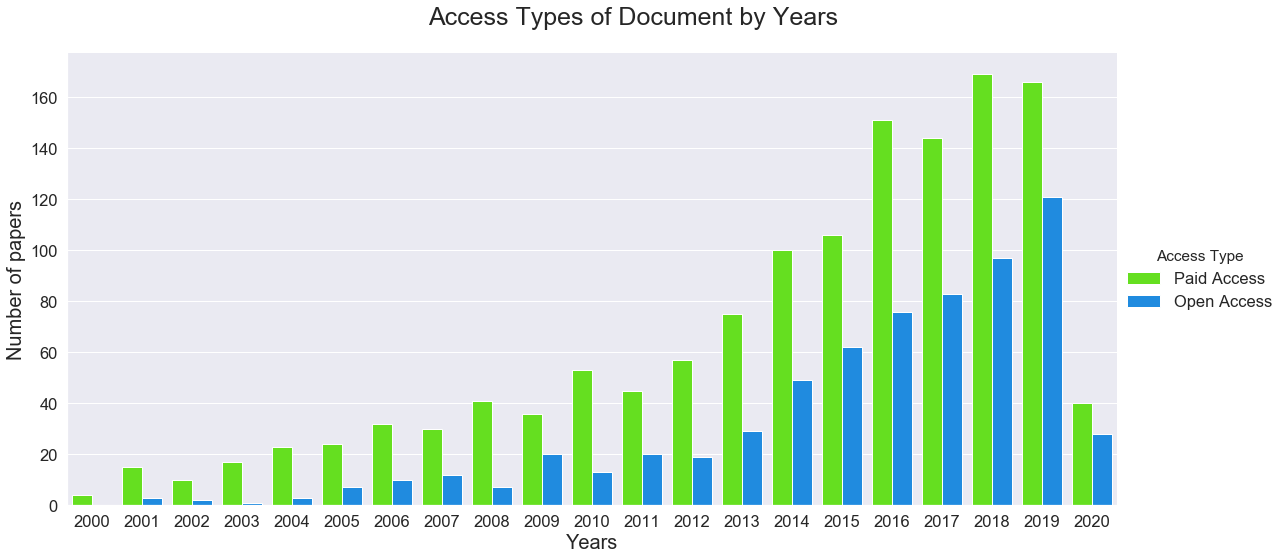

In [19]:
sns.set(style="whitegrid")
sns.set(font_scale = 1.5)
#sns.plt
g = sns.catplot(x="Year", y="count", hue="Access Type", data=doc_access,
                height=8, kind="bar", palette="gist_rainbow",aspect = 2)

g.set_ylabels("Number of papers",fontsize = 20)
g.set_xlabels("Years",fontsize = 20)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Access Types of Document by Years",fontsize = 25)

### Conclusion of the plot
- **In every year number of publications in paid access is much higher than open access**

### Plot 5. Most Productive Author

In [20]:
df_author = df_pre[['Authors','Year']]
df_author = df_author.reset_index()
df_author['Authors'] = df_author['Authors'].apply(lambda x : x.split(","))
df_author.head()

index                                            Authors  Year
0      0  [Larsen B.,  Olafsson V.,  Calabro F.,  Laymon...  2020
1      1  [Sun W.W.,  Krystofiak E.S.,  Leo-Macias A.,  ...  2020
2      2  [Musio B.,  Ragone R.,  Todisco S.,  Rizzuti A...  2020
3      3  [MacArthur J.L.,  Hoicka C.E.,  Castleden H., ...  2020
4      4  [Lannes-Costa P.S.,  Baraúna R.A.,  Ramos J.N....  2020

In [21]:
authors = []
for author in df_author['Authors']:
    authors.append(author)
flat_list = [item for sublist in authors for item in sublist]

In [22]:
author_count = []
for i in flat_list:
    count = flat_list.count(i)
    author_count.append((i,count))
author_count = list(set(author_count))

In [29]:
productive_author = []
no_of_papers = []
for author,count in author_count:
    if count > 5:
        productive_author.append(author)
        no_of_papers.append(count)
df_pro_author = pd.DataFrame({
    'author':productive_author,
    'paper_published':no_of_papers
})


In [31]:
fig = px.area(df_pro_author,x="author",y="paper_published")
fig.update_layout(title={
        'text': "Most Productive Authors over the period of 20 years",
        'y':0.95,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title='Author Names',
        yaxis_title='Number of Papers Published'
                 )
fig.show()

### Conclusion of the plot
- **Wang J. and Wang Y. has published highest number of papers over the period of 20 years**

### Plot 6. Documents by source per year

In [32]:
df_source = pd.DataFrame({'count': df_pre.groupby(['Year','Source title']).size()}).reset_index()

In [33]:
df_temp_1 = pd.DataFrame({'freq':df_source['Source title'].value_counts()}).reset_index()
sources = list(df_temp_1[df_temp_1['freq'] > 8]['index'])
#year = list(df_temp_1[df_temp_1['freq'] > 5]['index'])


In [34]:
df_temp = pd.DataFrame()
for i in sources:
    df_temp = df_temp.append(df_source[df_source["Source title"] == i])


In [35]:
alt.Chart(df_temp).mark_line(point=True).encode(
    x='Year',
    y='count',
    color='Source title'
).properties(
    width=800,height = 400,title = "Document per year by source title")

alt.Chart(...)

### Conclusion of the plot
- **PLoS ONE shows higher trend in no of publications over the years starting from 2011 to 2015**

### Plot 7. Scatter Text Plot

In [36]:
df_control_terms_1 = df_pre[['Author Keywords']]
df_control_terms_1 = df_control_terms_1.reset_index()
df_control_terms_1 = df_control_terms_1.dropna()
df_control_terms_2 = df_pre[['Index Keywords']]
df_control_terms_2 = df_control_terms_2.reset_index()
df_control_terms_2 = df_control_terms_2.dropna()

In [37]:
df_control_terms_1 = df_control_terms_1.rename(columns={"Author Keywords": "keywords"})
df_control_terms_2 = df_control_terms_2.rename(columns={"Index Keywords": "keywords"})

In [38]:
df_control_terms_1["Category"] = np.nan
df_control_terms_1["Category"] = df_control_terms_1["Category"].fillna('Author_Keyword')
df_control_terms_2['Category'] = np.nan
df_control_terms_2['Category']  = df_control_terms_2["Category"].fillna('Index_Keyword')
df_terms = df_control_terms_1.append(df_control_terms_2)


In [39]:
df_terms['parsed'] = df_terms.keywords.apply(nlp)

In [40]:
df_terms.groupby('Category').apply(lambda x: x.keywords.apply(lambda x: len(x.split())).sum())

Category
Author_Keyword     13763
Index_Keyword     106474
dtype: int64

In [41]:
corpus = st.CorpusFromParsedDocuments(df_terms, category_col='Category', parsed_col='parsed').build()


In [42]:
html = produce_scattertext_explorer(corpus,
                                    category='Author_Keyword',
                                    category_name='Author_keyword',
                                    not_category_name='Index_Keyword',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=df_terms['Category'])
file_name = 'Desktop/scatter_text.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1000, height=700)

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/scattertext/termscoring/ScaledFScore.py:300: RuntimeWarning:

divide by zero encountered in true_divide

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/scattertext/termscoring/ScaledFScore.py:300: RuntimeWarning:

invalid value encountered in true_divide



### Conclusion of the plot
- **For author keywords : "Data" and "visualization" are the words lies in Frequent category**
- **For Index Keywords : "Protein" lies in the Frequent category**

### Plot 8. Documents by Language

In [43]:
df_temp = df_pre[['Language of Original Document']]
df_language = pd.DataFrame({'count':df_temp['Language of Original Document'].value_counts()}).reset_index()
# bubble chart

In [44]:
df_language['count']

0     1974
1        7
2        4
3        3
4        3
5        2
6        2
7        2
8        1
9        1
10       1
Name: count, dtype: int64

In [45]:
import plotly.graph_objects as go
colors = ['#58FAF4','#0080FF','#0040FF','#3A01DF',"#7401DF","#A901DB"]
fig = go.Figure(data=go.Scatter(
    x=['English', 'Chinese', 'German', 'Russian', 'Portuguese', 'Spanish',
       'English; French', 'French', 'Italian', 'English; German',
       'English; Polish'],
    y=[1947,7,4,3,3,2,2,2,1,1,1],
    mode='markers',
    marker=dict(size=[150,80,60,40,40,20,20,20,10,10,10],
                color=colors)
))
fig.update_layout(title={
        'text': "Documents by Language",
        'y':0.95,
        'x':0.37,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title='Language of the Original Document',
        yaxis_title='Number of Documents',
                 )
fig.show()

### Conclusion of the plot
- **Size of the bubble show that Number of documents belogs to which original language as Size of the English Language bubble is largest so it shows generally the original language of the document was English and only 7 papers were of chinese language and translated to english while adding to the scopus library.**

### Plot 9. Most Cited Articles

In [46]:
df_cited = df_pre[['Cited by']]
df_cited['Cited by'] = df_cited['Cited by'].fillna(0)

In [47]:
df_cited['Cited by'].sort_values(ascending=False).head(20)

1972    2662.0
1582    1270.0
1916    1151.0
1458    1146.0
1995    1119.0
1143     910.0
1965     732.0
1842     600.0
1408     491.0
1929     486.0
1980     445.0
1731     411.0
1809     411.0
1718     408.0
1994     370.0
1698     359.0
1970     354.0
1921     345.0
1823     317.0
1847     311.0
Name: Cited by, dtype: float64

In [48]:
df_article = pd.DataFrame({
    'Article_Number':['1972','1582','1916','1458','1995','1143','1965','1842','1408','1929','1980','1731','1809','1718','1994','1698','1970','1921','1823','1847'],
    'Number_of_Citations':[2662, 1270, 1151, 1146, 1119,  910,  732,  600,  491,486,  445,  411,  411,  408,  370,  359,  354,  345,317,311]
})

In [49]:
from altair import Row, Column, Chart, Text, Scale, Color
chart = Chart(df_article).mark_bar().encode(x='Article_Number',y='Number_of_Citations', color='Number_of_Citations').properties(
    width=800,height = 400,title = "Most Cited papers from year 2000-2019")
display(chart)

alt.Chart(...)

### Conclusion :
- **Article no. 1972 has the most number of citations , approximately higher than 2500 citations**

### Plot 10. Most Important words in title

In [50]:
df_title = df_pre[['Title']]
df_title['Title'] = df_title['Title'].apply(lambda x : str.lower(x))
df_title['Title'] = df_title['Title'].apply(lambda x : " ".join(re.findall('[\w]+',x)))
df_title['Title'] = df_title['Title'].apply(lambda x : remove_stop_words(x))

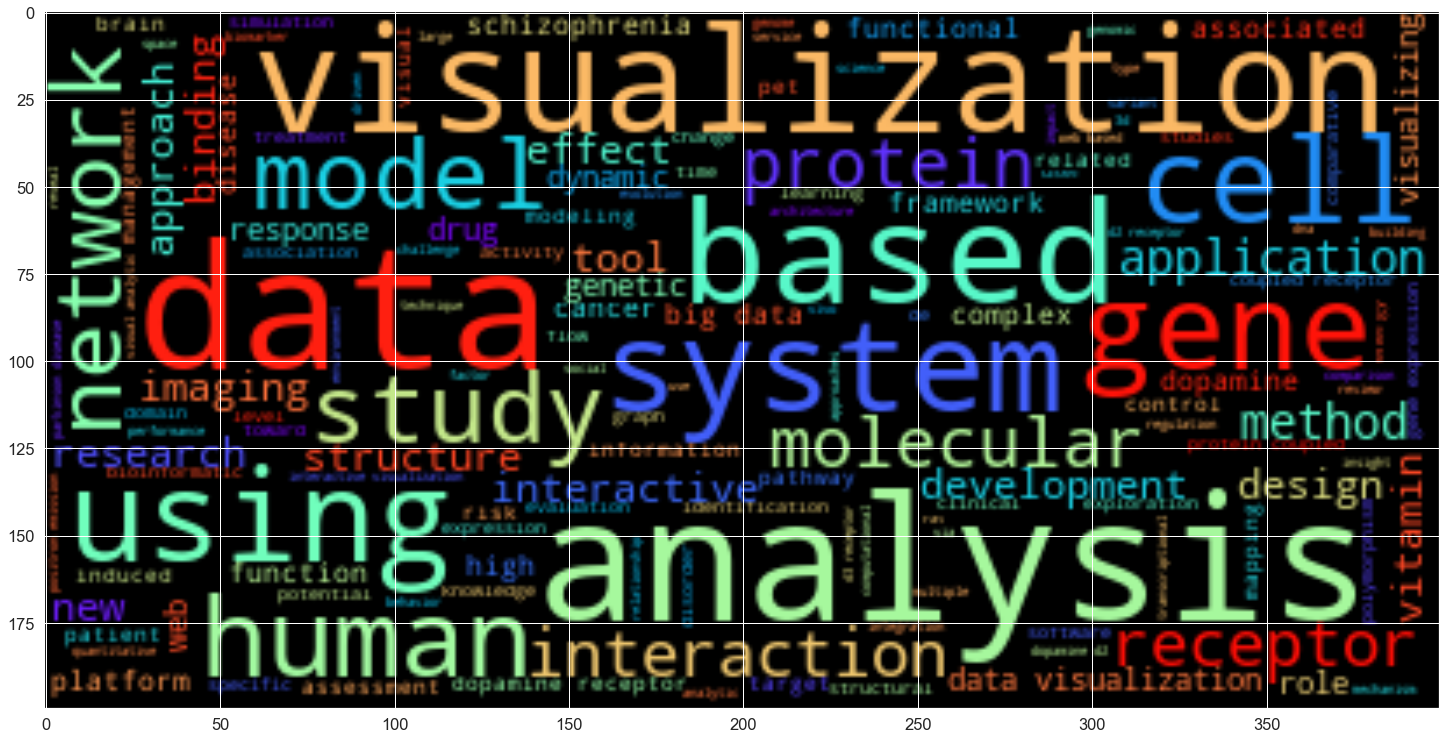

In [51]:
text = df_title.Title[0]
text = " ".join(title for title in df_title.Title)
wordcloud = WordCloud(max_font_size = 50,background_color = 'black',colormap='rainbow').generate(text)
fig,ax = plt.subplots(figsize = (25,25))
plt.imshow(wordcloud,interpolation='bilinear')
#plt.axis('off')
plt.show()

### Conclusion:
- **Most Important words for the title of publication are "data","visualization" and "analysis" which frequently comes into title**

### Plot 11. Countries by Document

In [52]:
df_add = df_pre[['Correspondence Address']]

In [53]:
country = ['United States','United Kingdom','Germany','China','Canada',
           'France','Italy','Spain','Netherlands','Japan','Australia',
          'Brazil','Finland','Sweden','Austria','Belgium','India','Denmark',
           'South Korea','Poland','Norway','Greece','Czech Republic']


In [54]:
country_count = []
for i in range(len(country)):
    count = df_add['Correspondence Address'].str.contains(country[i]).sum()
    country_count.append(count)

In [55]:
df_country = pd.DataFrame({
    'Country':country,
    'No_of_Documents':country_count
})

In [56]:
from plotnine import * 

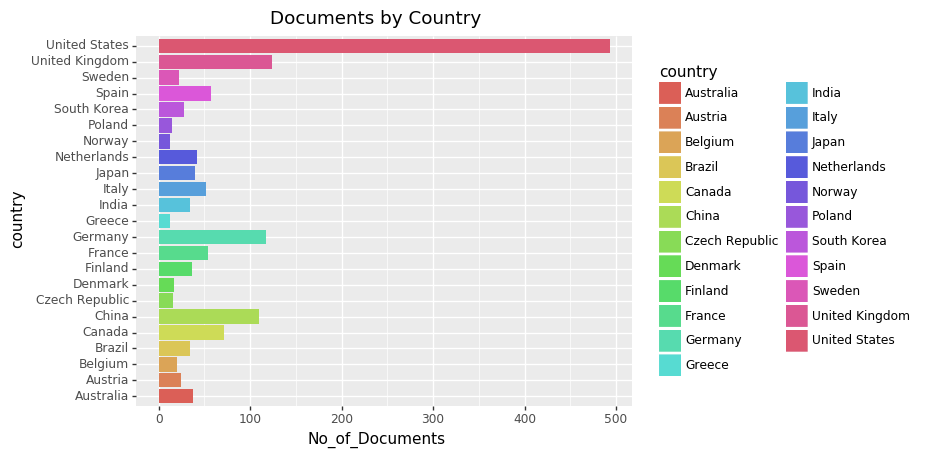

<ggplot: (335022457)>

In [57]:
country_plot = ggplot(df_country, aes(x='country', y='No_of_Documents', fill='country')) + geom_col() + coord_flip()\
 + ggtitle('Documents by Country')
display(country_plot)


### Conclusion:
- **United states has highest contribution in Research**